# Øvelse 1:
I skal analysere på ”California housing prices” (https://www.kaggle.com/camnugent/california-housingprices),
som også benyttes i lærebogen.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## a) Plot fordelingen af median_income. Find også spredning, middel værdi og median.

Spredning: 	 1.899775694574878
Middel værdi: 	 3.8706710029070246
Median: 	 3.5347999999999997


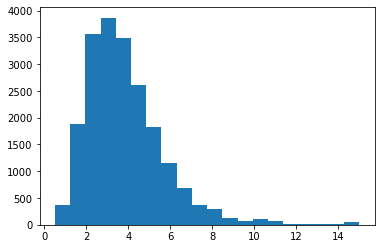

In [47]:
plt.hist(data['median_income'], bins=20)

std = np.std(data['median_income'])
mu = np.mean(data['median_income'])
median = np.median(data['median_income'])

print('Spredning: \t {}'.format(std))
print('Middel værdi: \t {}'.format(mu))
print('Median: \t {}'.format(median))

## b) Er der forskel på median og middelværdi af median_income ? Hvilken af de to beskriver bedst en ”almindelig families indkomst” og hvorfor ?

Middel værdien er en smule større end medianen. <br> 
Medianen ville være bedst til at beskrive den almindelige families indkomst. Da den ikke bliver påvirket at ”out-liers” som i dette tilfælde ville være familier med indkomster langt over gennemsnittet. 


## c) Fit en normalfordeling til data og plot histogrammet – passer de to ?

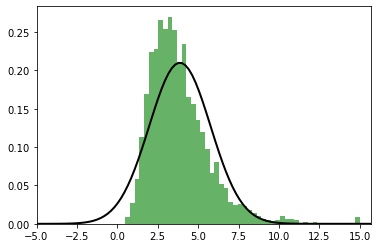

In [51]:
from scipy.stats import norm

plt.hist(data['median_income'], bins=50, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim(-5)
x = np.linspace(xmin, xmax, 100)
plt.plot(x, norm.pdf(x, mu, std), 'k', linewidth=2)

## d) Er der sammenhæng imellem median_house_value og median_income ? Lav korrelationsplot.

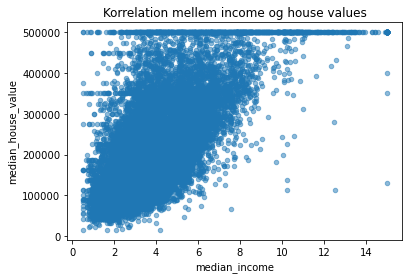

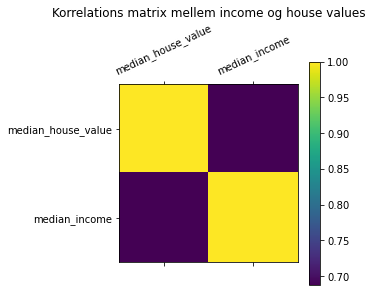

In [64]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5, title='Korrelation mellem income og house values')

features = ['median_house_value', 'median_income']
corr_coe = data[features].corr()

corr = plt.matshow(corr_coe)
plt.xticks(range(len(features)), features, fontsize=10, rotation=25)
plt.yticks(range(len(features)), features, fontsize=10)
plt.title('Korrelations matrix mellem income og house values')
plt.colorbar(corr)

## e) Hvad er 5% og 95% percentilerne af median_house_value?
(dvs. grænserne for 5% laveste og højeste). Plot også fordelingen af median_house_value. Kommentér på realismen af max-værdi
og 95% percentil – foreslå gerne en løsning til hvad man kan gøre ved dette, hvis man skal have
mere realistiske data.

5% precentile: 26695.85
95% precentile: 49800.00


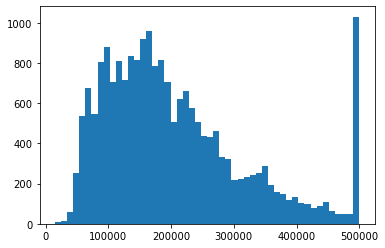

In [78]:
plt.hist(data['median_house_value'], bins=50)
print('5% precentile: {:.2f}\n95% precentile: {:.2f}'.format(np.percentile(data['median_house_value'], .05), np.percentile(data['median_house_value'], .95)))

Det kan ses på plottet over at der er en del som har en indkomst på 500.000 dollars. Dette ville være med til at øge middel indkomsten, og være med til at give et skævt billede af en almindelig families indkomst. Her kan man fjerne alle værdier over ~95% precentilen.